## Import des bibliothèques et des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data1 = pd.read_csv("data.csv")


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Détermination de la cible et du jeu de données

In [3]:
X = data1.iloc[:,3:-1]
Y = data1["Exited"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Score_Credit    10000 non-null  int64  
 1   Pays            10000 non-null  object 
 2   Sex             10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   Num_Produit     10000 non-null  int64  
 7   il_a_CrCard     10000 non-null  int64  
 8   Membre_actif    10000 non-null  int64  
 9   Salaire_estime  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


## Encodage des variables 

In [4]:
# Encodage des variables Sex et Pays
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data2_pays = data1["Pays"]
data2_pays_encoded = encoder.fit_transform(data2_pays)
data2_sexe = data1["Sex"]
data2_sexe_encoded = encoder.fit_transform(data2_sexe)
data2_sexe_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [5]:
# Reformation du jeu de données
X = pd.DataFrame(np.c_[data1['Score_Credit'],data2_pays_encoded, data2_sexe_encoded, data1['Age'], data1['Tenure'], data1['Balance'], data1['Num_Produit'], data1['il_a_CrCard'], data1['Membre_actif'], data1['Salaire_estime']], columns = ['Score_Credit','Pays','Sex','Age', 'Tenure','Balance','Num_Produit','il_a_CrCard', 'Membre_actif', 'Salaire_estime'])

In [6]:
# Affichage du jeu de données
X

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


## Fractionnement le jeu de données en jeu d'entraînement et jeu de test (1/3 pour le test)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Régression Logistique

In [8]:
# Entraînement et prédictions
from sklearn.linear_model import LogisticRegression
regre_logis = LogisticRegression()
regre_logis.fit(X_train, Y_train)
predicts_logi = regre_logis.predict(X_test)

### Evaluation de la Régression Logistique

In [9]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(Y_test, predicts_logi)
accu_score

0.8015151515151515

## Arbre de décision 

In [10]:
# Entraînement et prédictions
from sklearn.tree import DecisionTreeClassifier
arbre_decision = DecisionTreeClassifier()
arbre_decision.fit(X_train, Y_train)
predicts_arbre = arbre_decision.predict(X_test)

### Evaluation de l'Arbre de décision

In [11]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(Y_test, predicts_arbre)
accu_score

0.7827272727272727

## Forêts Aléatoires

In [12]:
# Entraînement et prédictions
from sklearn.ensemble import RandomForestClassifier
foret_aleatoire = RandomForestClassifier()
foret_aleatoire.fit(X_train, Y_train)
predicts_foret = foret_aleatoire.predict(X_test)

### Evaluation de Forêts Aléatoires

In [13]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(Y_test, predicts_foret)
accu_score

0.8663636363636363

## K plus proches voisins

In [14]:
# Entraînement et prédictions
from sklearn.neighbors import KNeighborsClassifier
kppv = KNeighborsClassifier()
kppv.fit(X_train, Y_train)
predicts_kppv = kppv.predict(X_test)


### Evaluation des K plus proches voisins

In [15]:
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(Y_test,predicts_kppv)
accu_score

0.769090909090909

## Machine vecteurs de supports

In [16]:
# Entraînement et prédictions
from sklearn.svm import SVC
SVM = SVC(gamma ='auto')
SVM.fit(X_train, Y_train)
predicts_SVM = SVM.predict(X_test)

### Evaluation Machine vecteurs de supports

In [17]:
# Accuracy score
from sklearn.metrics import accuracy_score
accu_score = accuracy_score(Y_test,predicts_SVM)
accu_score

0.8051515151515152

### Optimisation Machine vecteurs de supports

In [18]:
# Création de la variable param_grid
param_grid = {'C': (1,10,100,1000)}

In [19]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVM, param_grid, cv = 10)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(gamma='auto'),
             param_grid={'C': (1, 10, 100, 1000)})

In [20]:
#  Affichage les meilleurs paramètres de la méthode 
grid_search.best_params_

{'C': 1}

In [21]:
# Entraînement votre modèle avec ces paramètres sur les données d'apprentissage 
SVM = SVC(C = 1, gamma= 'auto')
SVM.fit(X_train, Y_train)

SVC(C=1, gamma='auto')

In [22]:
# Affichache du score de l'entraînement
SVM.score(X_train, Y_train)

1.0

In [23]:
# Prédictions et précision
predicts_SVM = SVM.predict(X_test)
accu_score = accuracy_score(Y_test,predicts_SVM)
accu_score

0.8051515151515152

In [24]:
# Matrice de confusion sur les prédictions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predicts_SVM)

array([[2657,    0],
       [ 643,    0]], dtype=int64)

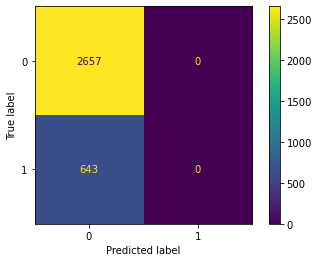

In [25]:
# Matrice de confusion sur le jeu de test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM, X_test, Y_test)

# CNN

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [34]:
# Instanciation du modèle
model = keras.Sequential([ 
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
# Entraînement du modèle
model.fit(X_train, Y_train, epochs=10, batch_size=1)

# Phase de test du modèle 
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
6700/6700 [==============================] - 36s 5ms/step - loss: 811.2858 - accuracy: 0.6734
Epoch 2/10
6700/6700 [==============================] - ETA: 0s - loss: 207.1158 - accuracy: 0.67 - 32s 5ms/step - loss: 207.1110 - accuracy: 0.6712
Epoch 3/10
6700/6700 [==============================] - 32s 5ms/step - loss: 90.4738 - accuracy: 0.7009
Epoch 4/10
6700/6700 [==============================] - ETA: 0s - loss: 17.6807 - accuracy: 0.700 - 33s 5ms/step - loss: 17.6789 - accuracy: 0.7006
Epoch 5/10
6700/6700 [==============================] - 28s 4ms/step - loss: 1.1435 - accuracy: 0.7711
Epoch 6/10
6700/6700 [==============================] - 31s 5ms/step - loss: 0.5114 - accuracy: 0.7932
Epoch 7/10
6700/6700 [==============================] - 31s 5ms/step - loss: 0.5177 - accuracy: 0.7886
Epoch 8/10
6700/6700 [==============================] - 31s 5ms/step - loss: 0.5089 - accuracy: 0.7952 0s - loss: 0.508
Epoch 9/10
6700/6700 [==============================] - 33s 5ms/s

## Conclusion